In [6]:
# Importing the standard Python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the EMA workbench packages
from ema_workbench import ema_logging, load_results
ema_logging.log_to_stderr(level=ema_logging.INFO)
from ema_workbench.analysis.plotting import envelopes, lines

# Scenario Discovery

In [7]:
# Load in the results
results = load_results('3000runs_5ticks_5replications_Uncertainties&Policies')

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Desktop\Final Documents Thesis\3000runs_5ticks_5replications_Uncertainties&Policies


In [8]:
# Load the scenarios
experiments = results[0]
experiments.head()

,technology_heat,variance_income,variance_socialnetwork,subsidies,medium_socialnetwork_group,large_size_community,mean_energylabel,technologies_more_sustainable,variance_typebuilding,radius_socialnetwork,...,variance_energylabel,mean_income,variance_typehousehold,mean_ownership,large_socialnetwork_group,companies_utility_sector,range_inclusiveness,scenario_id,policy,model
0,1.0,0.000000,0.021161,1.0,7.0,220.0,1.521390,1.0,0.129352,2.639448,...,0.383745,1.000000,0.736271,1.235294,26.0,1.0,28.579934,0,None,Netlogo
1,1.0,0.197529,0.213476,1.0,7.0,220.0,1.525576,1.0,0.127440,2.639448,...,0.372524,1.500000,0.744672,1.233222,26.0,1.0,28.579934,1,None,Netlogo
2,1.0,0.848292,0.248501,1.0,7.0,220.0,1.539124,1.0,0.152436,2.639448,...,0.383482,2.000000,0.713605,1.230777,26.0,1.0,28.579934,2,None,Netlogo
3,1.0,0.630372,0.240855,1.0,7.0,220.0,1.530887,1.0,0.138264,2.639448,...,0.378645,1.608658,0.725650,1.117647,26.0,1.0,28.579934,3,None,Netlogo
4,1.0,0.646575,0.269905,1.0,7.0,220.0,1.527232,1.0,0.138293,2.639448,...,0.378011,1.602140,0.745055,1.617647,26.0,1.0,28.579934,4,None,Netlogo


In [9]:
# Drop the colums of the experiments dataframe that are not necessary
experiments = experiments.drop(['mean_income', 'mean_ownership', 'mean_socialnetwork',
                                'mean_typehousehold', 'mean_energylabel', 'mean_typebuilding',
                                'variance_income', 'variance_ownership', 'variance_socialnetwork',
                                'variance_typehousehold', 'variance_energylabel', 'variance_typebuilding',
                                'scenario_id','policy','model'], axis=1)

In [10]:
# Creating a dataframe with the covariances and the mean and variance of every conversion factor group
name_variable_0 = 'mean_energylabel'
type_variable_0 = 'input'

name_variable_1 = 'variance_energylabel'
type_variable_1 = 'input'

name_variable_2 = 'mean_income'
type_variable_2 = 'input'

name_variable_3 = 'variance_income'
type_variable_3 = 'input'

name_variable_4 = 'mean_ownership'
type_variable_4 = 'input'

name_variable_5 = 'variance_ownership'
type_variable_5 = 'input'

name_variable_6 = 'mean_socialnetwork'
type_variable_6 = 'input'

name_variable_7 = 'variance_socialnetwork'
type_variable_7 = 'input'

name_variable_8 = 'mean_typebuilding'
type_variable_8 = 'input'

name_variable_9 = 'variance_typebuilding'
type_variable_9 = 'input'

name_variable_10 = 'mean_typehousehold'
type_variable_10 = 'input'

name_variable_11 = 'variance_typehousehold'
type_variable_11 = 'input'

name_variable_12 = 'covariance_security_security'
type_variable_12 = 'output'

name_variable_13 = 'covariance_security_affordability'
type_variable_13 = 'output'

name_variable_14 = 'covariance_security_sustainability'
type_variable_14 = 'output'

name_variable_15 = 'covariance_security_autonomy'
type_variable_15 = 'output'

name_variable_16 = 'covariance_security_comfort'
type_variable_16 = 'output'

name_variable_17 = 'covariance_security_inclusiveness'
type_variable_17 = 'output'

name_variable_18 = 'covariance_affordability_affordability'
type_variable_18 = 'output'

name_variable_19 = 'covariance_affordability_sustainability'
type_variable_19 = 'output'

name_variable_20 = 'covariance_affordability_autonomy'
type_variable_20 = 'output'

name_variable_21 = 'covariance_affordability_comfort'
type_variable_21 = 'output'

name_variable_22 = 'covariance_affordability_inclusiveness'
type_variable_22 = 'output'

name_variable_23 = 'covariance_sustainability_sustainability'
type_variable_23 = 'output'

name_variable_24 = 'covariance_sustainability_autonomy'
type_variable_24 = 'output'

name_variable_25 = 'covariance_sustainability_comfort'
type_variable_25 = 'output'

name_variable_26 = 'covariance_sustainability_inclusiveness'
type_variable_26 = 'output'

name_variable_27 = 'covariance_autonomy_autonomy'
type_variable_27 = 'output'

name_variable_28 = 'covariance_autonomy_comfort'
type_variable_28 = 'output'

name_variable_29 = 'covariance_autonomy_inclusiveness'
type_variable_29 = 'output'

name_variable_30 = 'covariance_comfort_comfort'
type_variable_30 = 'output'

name_variable_31 = 'covariance_comfort_inclusiveness'
type_variable_31 = 'output'

name_variable_32 = 'covariance_inclusiveness_inclusiveness'
type_variable_32 = 'output'

list_variables = []
list_variables.append([name_variable_0, type_variable_0])
list_variables.append([name_variable_1, type_variable_1])
list_variables.append([name_variable_2, type_variable_2])
list_variables.append([name_variable_3, type_variable_3])
list_variables.append([name_variable_4, type_variable_4])
list_variables.append([name_variable_5, type_variable_5])
list_variables.append([name_variable_6, type_variable_6])
list_variables.append([name_variable_7, type_variable_7])
list_variables.append([name_variable_8, type_variable_8])
list_variables.append([name_variable_9, type_variable_9])
list_variables.append([name_variable_10, type_variable_10])
list_variables.append([name_variable_11, type_variable_11])
list_variables.append([name_variable_12, type_variable_12])
list_variables.append([name_variable_13, type_variable_13])
list_variables.append([name_variable_14, type_variable_14])
list_variables.append([name_variable_15, type_variable_15])
list_variables.append([name_variable_16, type_variable_16])
list_variables.append([name_variable_17, type_variable_17])
list_variables.append([name_variable_18, type_variable_18])
list_variables.append([name_variable_19, type_variable_19])
list_variables.append([name_variable_20, type_variable_20])
list_variables.append([name_variable_21, type_variable_21])
list_variables.append([name_variable_22, type_variable_22])
list_variables.append([name_variable_23, type_variable_23])
list_variables.append([name_variable_24, type_variable_24])
list_variables.append([name_variable_25, type_variable_25])
list_variables.append([name_variable_26, type_variable_26])
list_variables.append([name_variable_27, type_variable_27])
list_variables.append([name_variable_28, type_variable_28])
list_variables.append([name_variable_29, type_variable_29])
list_variables.append([name_variable_30, type_variable_30])
list_variables.append([name_variable_31, type_variable_31])
list_variables.append([name_variable_32, type_variable_32])

combined_list = []
for i in list_variables:
    if i[1] == 'input':
        new_array = results[0][i[0]]
            
    if i[1] == 'output':
        new_list = []
        for i in results[1][i[0]]:
            new_list.append(i[0][-1])
        new_array = np.array(new_list)  
    combined_list.append(new_array)
    
df_total = pd.DataFrame({name_variable_0: combined_list[0], name_variable_1: combined_list[1], 
                   name_variable_2: combined_list[2], name_variable_3: combined_list[3], name_variable_4: combined_list[4],
                   name_variable_5: combined_list[5], name_variable_6: combined_list[6], name_variable_7: combined_list[7],
                   name_variable_8: combined_list[8], name_variable_9: combined_list[9], name_variable_10: combined_list[10],
                   name_variable_11: combined_list[11], name_variable_12: combined_list[12], name_variable_13: combined_list[13],
                   name_variable_14: combined_list[14], name_variable_15: combined_list[15], name_variable_16: combined_list[16],
                   name_variable_17: combined_list[17], name_variable_18: combined_list[18], name_variable_19: combined_list[19],
                   name_variable_20: combined_list[20], name_variable_21: combined_list[21], name_variable_22: combined_list[22],
                   name_variable_23: combined_list[23], name_variable_24: combined_list[24], name_variable_25: combined_list[25],
                   name_variable_26: combined_list[26], name_variable_27: combined_list[27], name_variable_28: combined_list[28],
                   name_variable_29: combined_list[29], name_variable_30: combined_list[30], name_variable_31: combined_list[31],
                   name_variable_32: combined_list[32]}, index=range(len(combined_list[0])))

df_total.head()

,mean_energylabel,variance_energylabel,mean_income,variance_income,mean_ownership,variance_ownership,mean_socialnetwork,variance_socialnetwork,mean_typebuilding,variance_typebuilding,...,covariance_sustainability_sustainability,covariance_sustainability_autonomy,covariance_sustainability_comfort,covariance_sustainability_inclusiveness,covariance_autonomy_autonomy,covariance_autonomy_comfort,covariance_autonomy_inclusiveness,covariance_comfort_comfort,covariance_comfort_inclusiveness,covariance_inclusiveness_inclusiveness
0,1.521390,0.383745,1.000000,0.000000,1.235294,0.180172,1.983957,0.021161,1.847594,0.129352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.525576,0.372524,1.500000,0.197529,1.233222,0.178451,2.486026,0.213476,1.849392,0.127440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.539124,0.383482,2.000000,0.848292,1.230777,0.176711,2.437465,0.248501,1.822390,0.152436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.530887,0.378645,1.608658,0.630372,1.117647,0.040260,2.383611,0.240855,1.839543,0.138264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.527232,0.378011,1.602140,0.646575,1.617647,0.218588,2.383029,0.269905,1.836248,0.138293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Remaining the columns necessary for the feature scoring
df_scen = df_total[['covariance_security_autonomy', 'covariance_security_comfort', 'covariance_security_inclusiveness',
'covariance_affordability_autonomy', 'covariance_affordability_comfort', 'covariance_affordability_inclusiveness',
'covariance_sustainability_autonomy', 'covariance_sustainability_comfort', 'covariance_sustainability_inclusiveness',
'covariance_autonomy_autonomy', 'covariance_autonomy_comfort', 'covariance_autonomy_inclusiveness', 'covariance_comfort_comfort',
'covariance_comfort_inclusiveness', 'covariance_inclusiveness_inclusiveness']]

In [12]:
# Give handy and right names to the columns
df_scen.columns = ['Sec-Aut', 'Sec-Com', 'Sec-Inc','Aff-Aut', 'Aff-Com', 'Aff-Inc','Sus-Aut', 'Sus-Com', 'Sus-Inc',
'Aut-Aut', 'Aut-Com', 'Aut-Inc', 'Com-Com', 'Com-Inc', 'Inc-Inc']

In [173]:
# Select one conflict at a time to conduct further analysis

conflict = 'Sec-Aut'
#conflict = 'Sec-Com'
#conflict = 'Sec-Inc'
#conflict = 'Aff-Aut'
#conflict = 'Aff-Com'
#conflict = 'Aff-Inc'
#conflict = 'Sus-Aut'
#conflict = 'Sus-Com'
#conflict = 'Sus-Inc'
#conflict = 'Aut-Aut'
#conflict = 'Aut-Com'
#conflict = 'Aut-Inc'
#conflict = 'Com-Com'
#conflict = 'Com-Inc'
#conflict = 'Inc-Inc'

## PRIM Analysis

In [174]:
# PRIM analysis
# Importing the PRIM analysis included in EMA workbench
from ema_workbench.analysis import prim

# Specifying the experiments and outcome
# For the outcome the threshold is set to keep the negative covariances as cases of interest
x = experiments
y = df_scen[conflict] <= 0

# Executing the PRIM analysis with threshold=0.8, which stands for the minimum coverage treshold that a box should meet
prim_alg = prim.Prim(x,y, threshold=0.8)

box = prim_alg.find_box()


[MainProcess/INFO] 359291 points remaining, containing 302070 cases of interest
[MainProcess/INFO] mean: 0.9560064068339562, mass: 0.05213044579463443, coverage: 0.05927765087562486, density: 0.9560064068339562 restricted_dimensions: 6


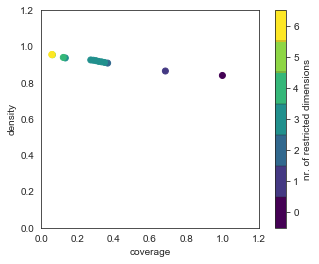

In [175]:
# Creating the trade-off visualisation
box.show_tradeoff()
plt.show()

In [183]:
# Inspecting the selected box for a coverage and density closest to 80%
box.inspect(1)

coverage    0.685308
density     0.865304
id                 1
mass        0.665853
mean        0.865304
res_dim            1
Name: 1, dtype: object

                box 1                                      
                  min  max                        qp values
technology_heat   1.5  3.0  [2.4222172870226887e-247, -1.0]



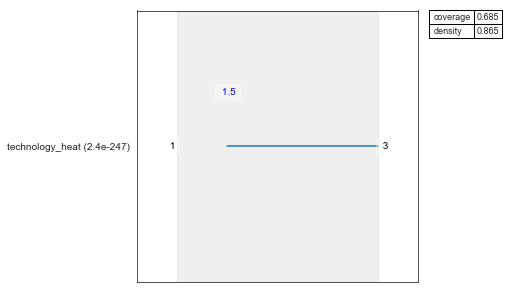

In [184]:
# Inspecting the selected box for a coverage and density closest to 80% - graph
box_graph = box.inspect(1, style='graph')
box_graph.set_size_inches(6,5)
plt.show()

## Regional Sensitivity Analysis

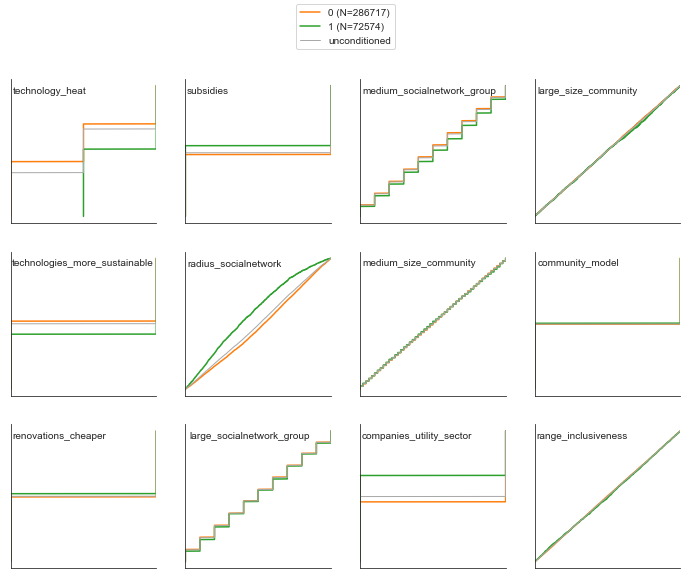

In [178]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

x = experiments.copy()
y = df_scen[conflict] <= -0.00000000001
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()

## Extra Trees Feature Scoring

In [179]:
# Executing the extra trees feature scoring analysis included in the EMA workbench analysis
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.feature_scoring import RuleInductionType

x = experiments
y = df_scen[conflict] <= -0.00000000001

fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=RuleInductionType.CLASSIFICATION)
fs.sort_values(ascending=False, by=1)

,1
0,
technology_heat,0.495807
radius_socialnetwork,0.156397
companies_utility_sector,0.115282
technologies_more_sustainable,0.039796
medium_socialnetwork_group,0.033779
range_inclusiveness,0.028762
large_socialnetwork_group,0.028342
large_size_community,0.027862
medium_size_community,0.027445


## Dimensional Stacking

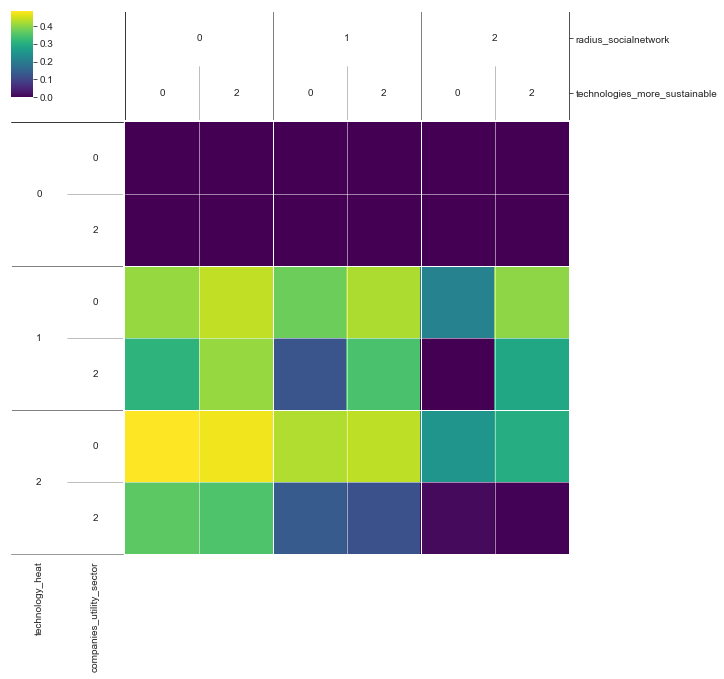

In [180]:
# Using dimensional stacking to check if the results of the scenario discovery give the same results
# The number of levels is set on 2, so the 4 most important uncertainties are shown
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(experiments,y, nr_levels=2) 
plt.show()